In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set(style="whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)


In [ ]:
df = pd.read_csv('personalized_learning_dataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of students: {df['Student_ID'].nunique()}")
print(f"Number of courses: {df['Course_Name'].nunique()}")

print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nColumn information:")
df.info()

print("\nSummary statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values in each column:")
display(df.isnull().sum())

Dataset shape: (10000, 15)
Number of students: 10000
Number of courses: 5

First 5 rows of the dataset:


,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No



Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedback_Score            

,Age,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Final_Exam_Score,Feedback_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,32.137700,255.375400,2.500500,64.578600,24.616200,69.546800,64.697000,3.012600
std,10.062647,141.656392,1.122642,20.289125,14.330305,17.360782,20.096417,1.421423
min,15.000000,10.000000,1.000000,30.000000,0.000000,40.000000,30.000000,1.000000
25%,24.000000,131.000000,1.000000,47.000000,12.000000,54.000000,47.000000,2.000000
50%,32.000000,257.000000,3.000000,65.000000,25.000000,69.000000,65.000000,3.000000
75%,41.000000,378.000000,4.000000,82.000000,37.000000,85.000000,82.000000,4.000000
max,49.000000,499.000000,4.000000,99.000000,49.000000,99.000000,99.000000,5.000000



Missing values in each column:


Student_ID                    0
Age                           0
Gender                        0
Education_Level               0
Course_Name                   0
Time_Spent_on_Videos          0
Quiz_Attempts                 0
Quiz_Scores                   0
Forum_Participation           0
Assignment_Completion_Rate    0
Engagement_Level              0
Final_Exam_Score              0
Learning_Style                0
Feedback_Score                0
Dropout_Likelihood            0
dtype: int64

/var/folders/ws/y7tkc8f533g645wt0w639fd80000gn/T/ipykernel_11999/2216503010.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/ws/y7tkc8f533g645wt0w639fd80000gn/T/ipykernel_11999/2216503010.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/ws/y7tkc8f533g645wt0w639fd80000gn/T/ipykernel_11999/2216503010.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/ws/y7tkc8f533g645wt0w639fd80000gn/T/ipykernel_11999/2216503010.py:12: UserWarning: set_ticklabels() should only be used 

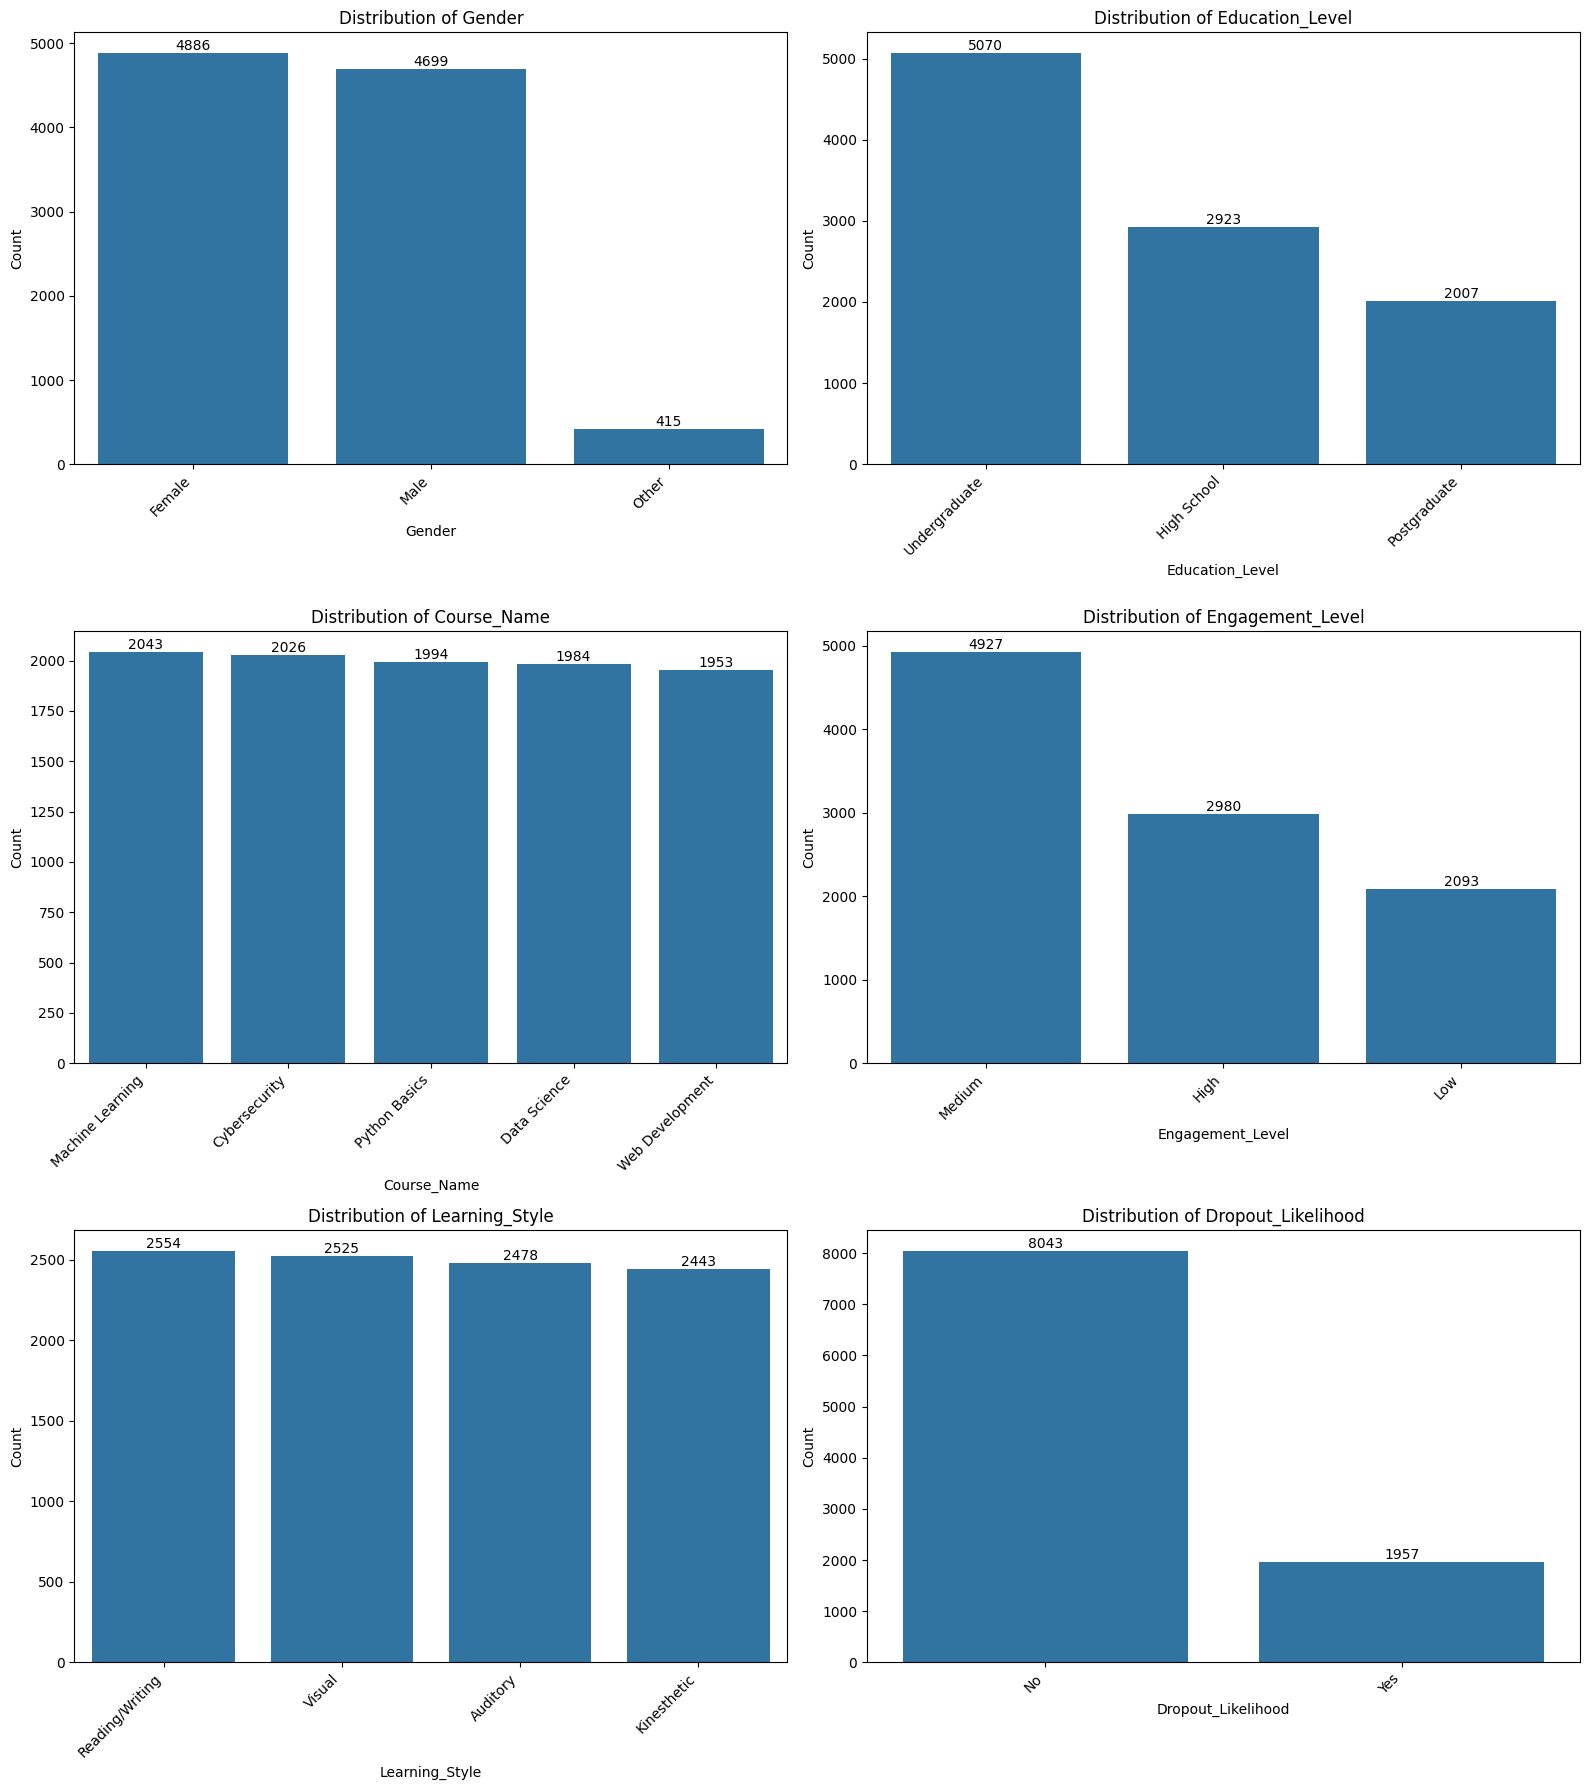

In [ ]:
categorical_cols = ['Gender', 'Education_Level', 'Course_Name', 'Engagement_Level', 
                    'Learning_Style', 'Dropout_Likelihood']

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts().sort_values(ascending=False)
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_ylabel('Count')
    
    # Add count labels on top of bars
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('categorical_distributions.png')
plt.show()

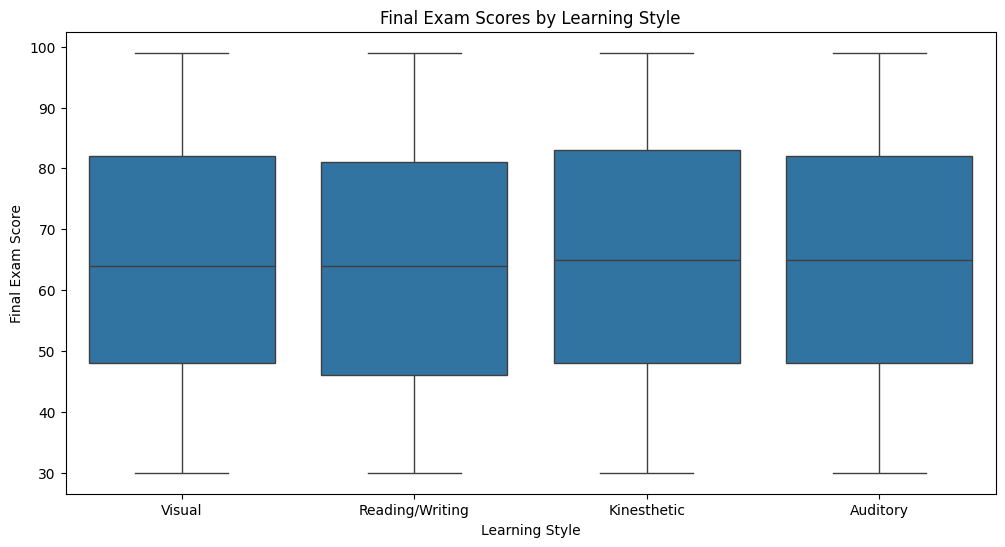

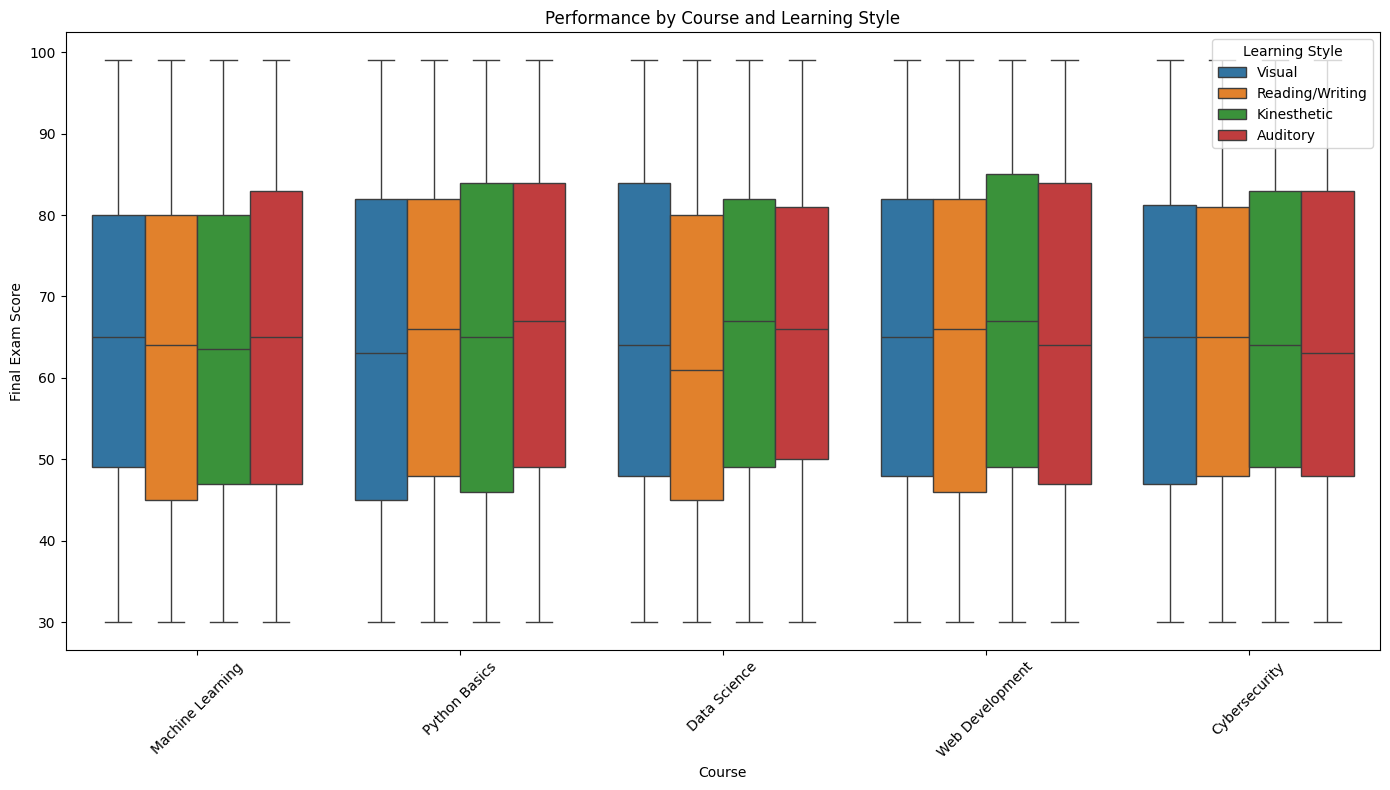

Average Final Exam Score by Course and Learning Style:


Learning_Style,Auditory,Kinesthetic,Reading/Writing,Visual
Course_Name,,,,
Cybersecurity,64.379699,64.912698,64.692771,64.916667
Data Science,65.066946,65.489837,62.262646,65.502000
Machine Learning,65.161677,63.750000,63.420370,65.067925
Python Basics,66.174636,64.954365,64.604462,63.393411
Web Development,64.855967,66.537155,64.457760,64.694045


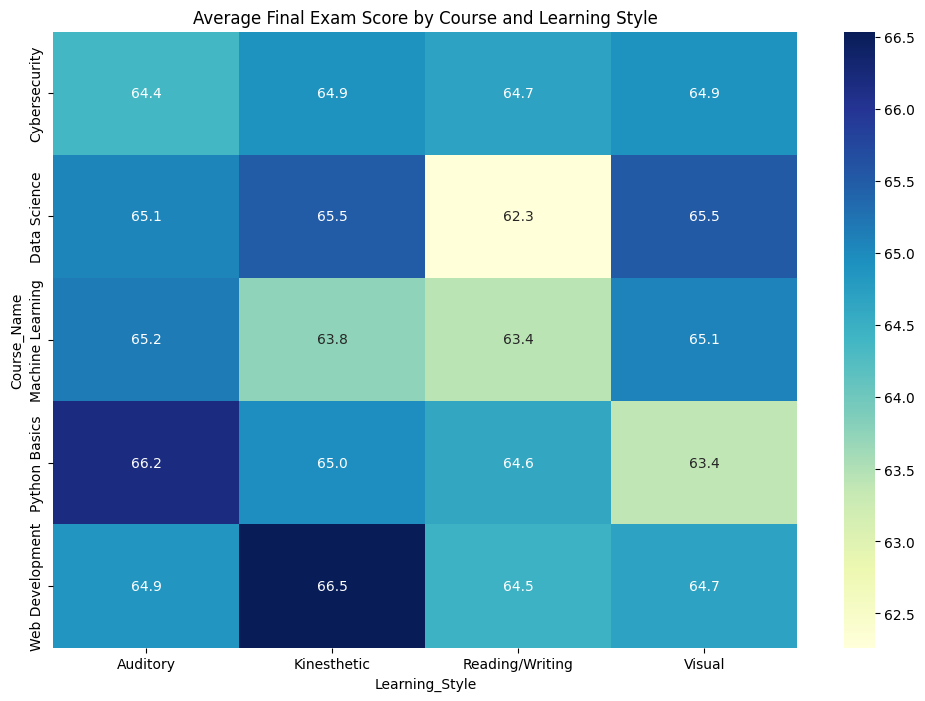

In [ ]:
# learning style
plt.figure(figsize=(12, 6))
sns.boxplot(x='Learning_Style', y='Final_Exam_Score', data=df)
plt.title('Final Exam Scores by Learning Style')
plt.xlabel('Learning Style')
plt.ylabel('Final Exam Score')
plt.savefig('learning_style_performance.png')
plt.show()

# different courses
plt.figure(figsize=(14, 8))
sns.boxplot(x='Course_Name', y='Final_Exam_Score', hue='Learning_Style', data=df)
plt.title('Performance by Course and Learning Style')
plt.xlabel('Course')
plt.ylabel('Final Exam Score')
plt.legend(title='Learning Style', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('learning_style_by_course.png')
plt.show()

# average scores 
learning_style_performance = df.groupby(['Course_Name', 'Learning_Style'])['Final_Exam_Score'].mean().unstack()
print("Average Final Exam Score by Course and Learning Style:")
display(learning_style_performance)

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(learning_style_performance, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Average Final Exam Score by Course and Learning Style')
plt.savefig('learning_style_course_heatmap.png')
plt.show()

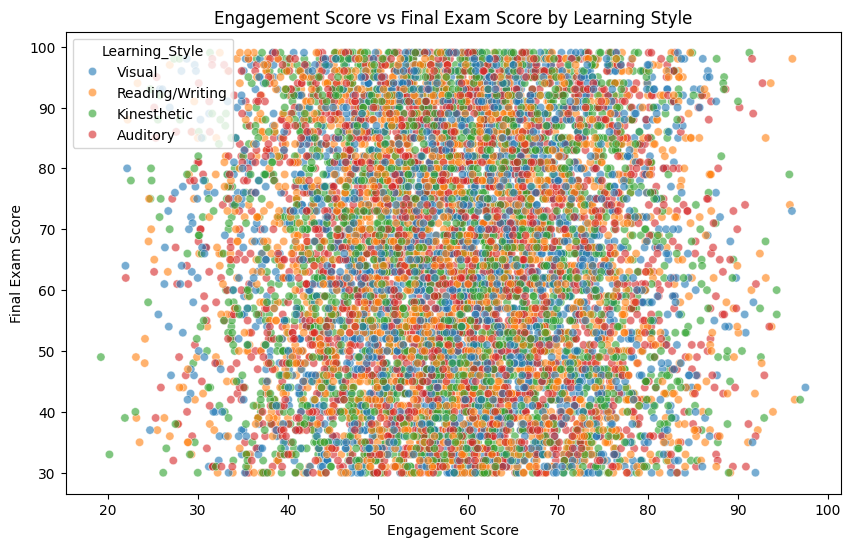

Correlation with Final Exam Score:


Final_Exam_Score              1.000000
Assignment_Completion_Rate    0.014466
Quiz_Scores                   0.004705
Forum_Participation          -0.006267
Time_Spent_on_Videos         -0.009718
Engagement_Score             -0.011272
Quiz_Attempts                -0.018079
Name: Final_Exam_Score, dtype: float64

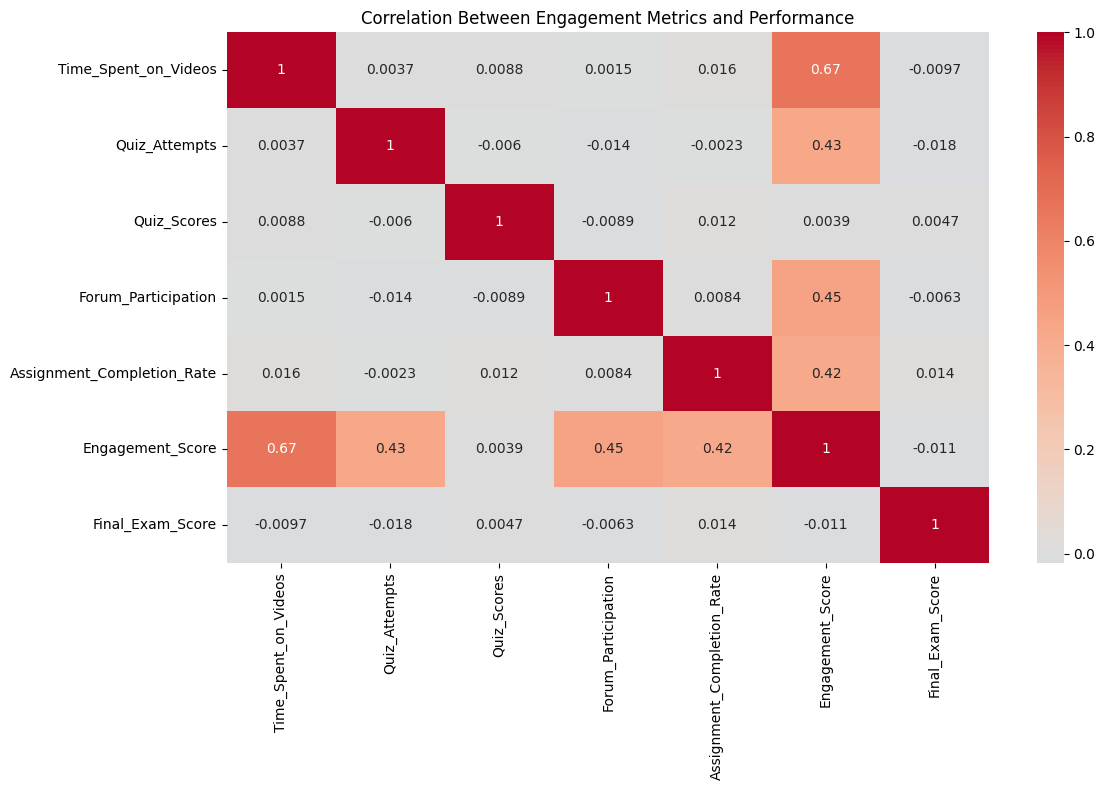

In [ ]:
# engagement score based on presumed importance
df['Engagement_Score'] = (
    0.3 * df['Time_Spent_on_Videos'] / df['Time_Spent_on_Videos'].max() +
    0.2 * df['Quiz_Attempts'] / df['Quiz_Attempts'].max() +
    0.2 * df['Forum_Participation'] / df['Forum_Participation'].max() +
    0.3 * df['Assignment_Completion_Rate'] / 100
) * 100

# Analyze relationship between engagement score and final exam score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engagement_Score', y='Final_Exam_Score', hue='Learning_Style', data=df, alpha=0.6)
plt.title('Engagement Score vs Final Exam Score by Learning Style')
plt.xlabel('Engagement Score')
plt.ylabel('Final Exam Score')
plt.savefig('engagement_vs_performance.png')
plt.show()

# Calculate correlation between engagement metrics and final score
engagement_cols = ['Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores',
                   'Forum_Participation', 'Assignment_Completion_Rate', 'Engagement_Score']
performance_corr = df[engagement_cols + ['Final_Exam_Score']].corr()['Final_Exam_Score'].sort_values(ascending=False)
print("Correlation with Final Exam Score:")
display(performance_corr)

plt.figure(figsize=(12, 8))
sns.heatmap(df[engagement_cols + ['Final_Exam_Score']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Engagement Metrics and Performance')
plt.tight_layout()
plt.savefig('engagement_correlation.png')
plt.show()

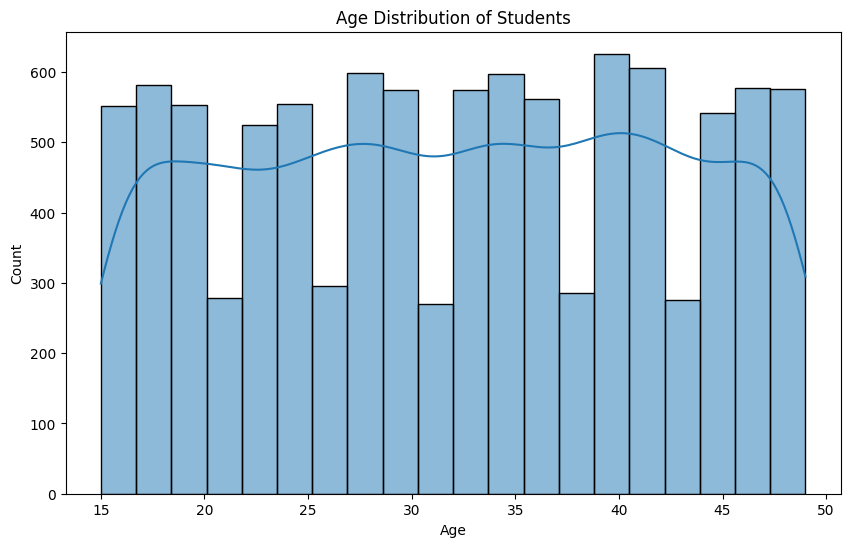

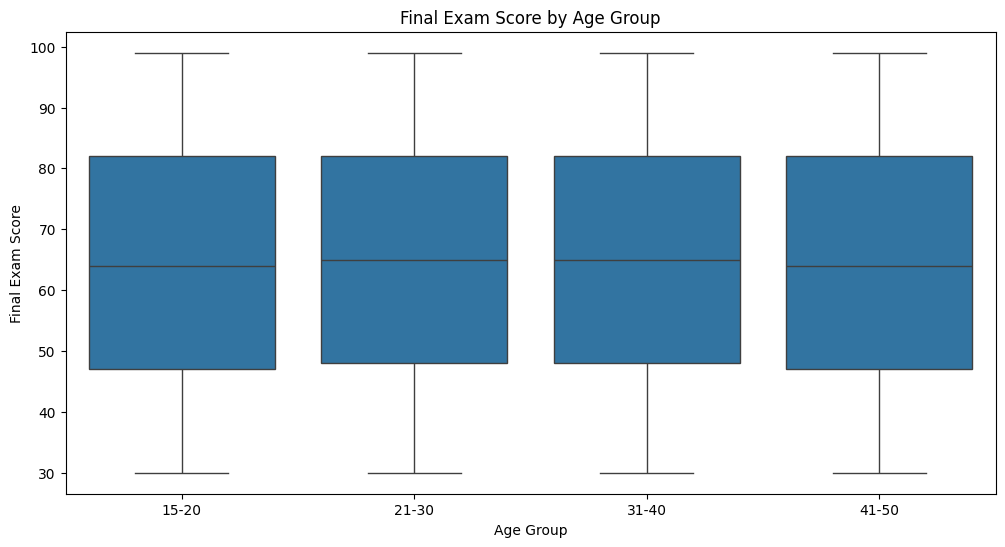

<Figure size 1200x800 with 0 Axes>

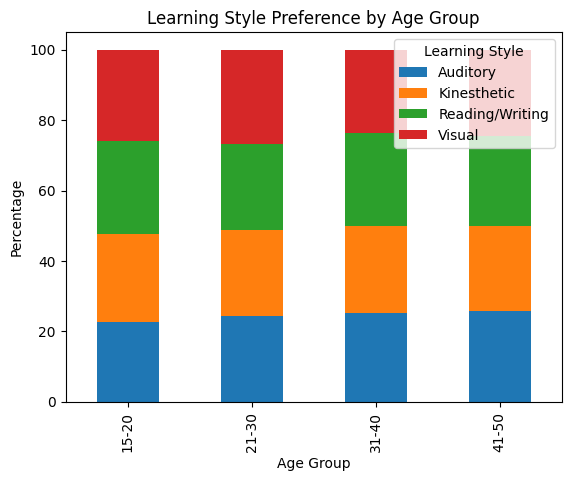

In [ ]:
# age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('age_distribution.png')
plt.show()

# performance by age group
df['Age_Group'] = pd.cut(df['Age'], bins=[15, 20, 30, 40, 50], 
                          labels=['15-20', '21-30', '31-40', '41-50'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Group', y='Final_Exam_Score', data=df)
plt.title('Final Exam Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Final Exam Score')
plt.savefig('performance_by_age.png')
plt.show()

# preferred learning styles by age group
learning_style_by_age = pd.crosstab(df['Age_Group'], df['Learning_Style'], normalize='index') * 100
plt.figure(figsize=(12, 8))
learning_style_by_age.plot(kind='bar', stacked=True)
plt.title('Learning Style Preference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Learning Style')
plt.savefig('learning_style_by_age.png')
plt.show()

Dropout Prediction Accuracy: 0.8077

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2431
           1       0.00      0.00      0.00       569

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.66      0.81      0.72      3000



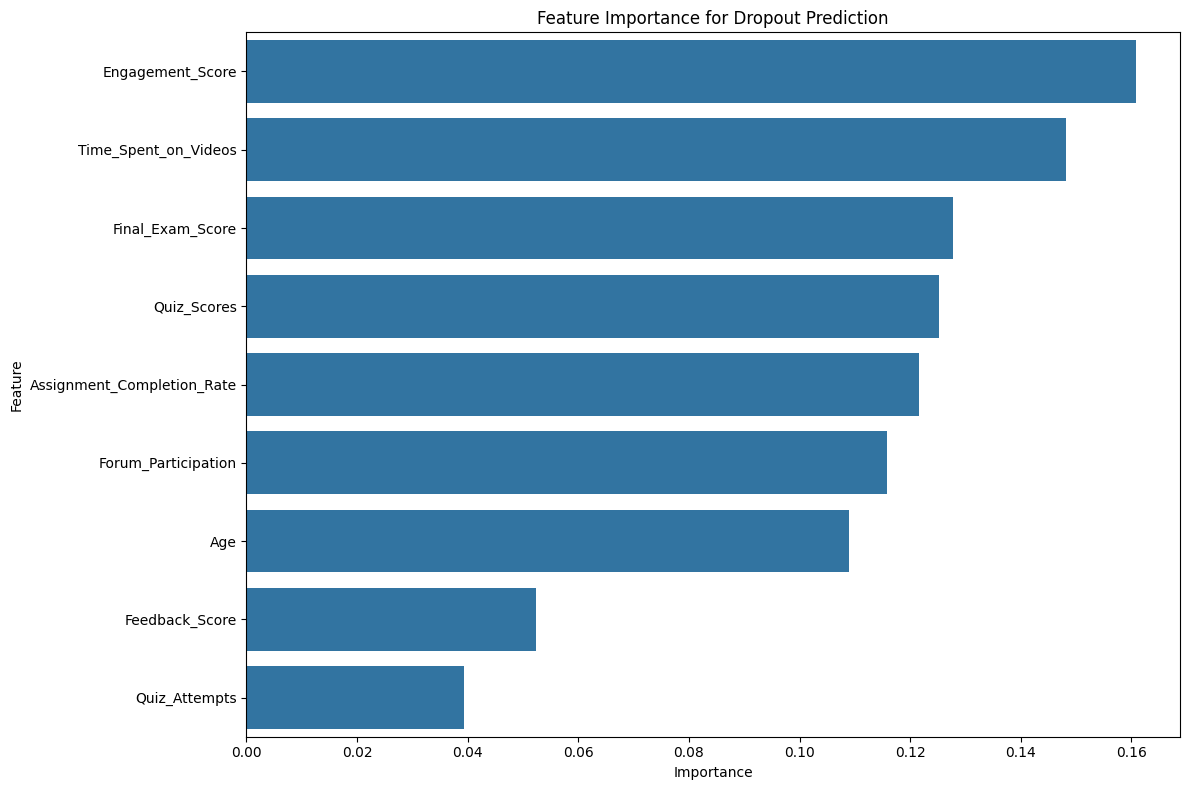

Dropout Prediction Accuracy: 0.8077

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2431
           1       0.00      0.00      0.00       569

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.66      0.81      0.72      3000



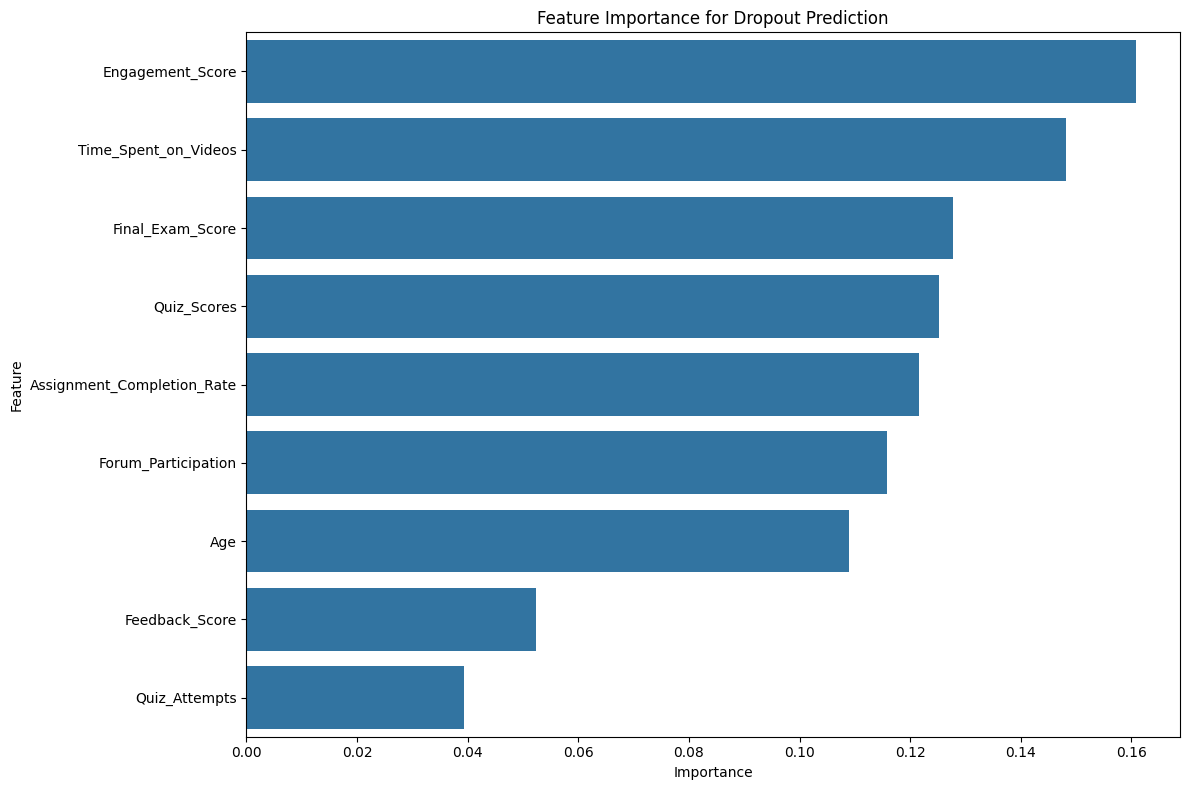

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# dropout likehood
df['Dropout'] = df['Dropout_Likelihood'].apply(lambda x: 1 if x == 'Yes' else 0)

X_dropout = df[['Age', 'Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores', 
               'Forum_Participation', 'Assignment_Completion_Rate', 'Final_Exam_Score',
               'Feedback_Score', 'Engagement_Score']]
y_dropout = df['Dropout']

X_train, X_test, y_train, y_test = train_test_split(X_dropout, y_dropout, test_size=0.3, random_state=42)

dropout_model = RandomForestClassifier(n_estimators=100, random_state=42)
dropout_model.fit(X_train, y_train)

y_pred = dropout_model.predict(X_test)
print(f"Dropout Prediction Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_dropout.columns,
    'Importance': dropout_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Dropout Prediction')
plt.tight_layout()
plt.savefig('dropout_feature_importance.png')
plt.show()
df['Dropout'] = df['Dropout_Likelihood'].apply(lambda x: 1 if x == 'Yes' else 0)

X_dropout = df[['Age', 'Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores', 
               'Forum_Participation', 'Assignment_Completion_Rate', 'Final_Exam_Score',
               'Feedback_Score', 'Engagement_Score']]
y_dropout = df['Dropout']

X_train, X_test, y_train, y_test = train_test_split(X_dropout, y_dropout, test_size=0.3, random_state=42)

dropout_model = RandomForestClassifier(n_estimators=100, random_state=42)
dropout_model.fit(X_train, y_train)

# Evaluate model
y_pred = dropout_model.predict(X_test)
print(f"Dropout Prediction Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

feature_importance = pd.DataFrame({
    'Feature': X_dropout.columns,
    'Importance': dropout_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Dropout Prediction')
plt.tight_layout()
plt.savefig('dropout_feature_importance.png')
plt.show()

In [ ]:
course_descriptions = {
    'Machine Learning': 'A comprehensive course on machine learning algorithms, techniques, and applications. Students will learn about supervised and unsupervised learning, neural networks, and practical implementation using Python libraries.',
    'Python Basics': 'An introduction to Python programming language. This course covers fundamental concepts including variables, data types, control structures, functions, and basic data manipulation.',
    'Data Science': 'This course provides an overview of the data science pipeline. Topics include data cleaning, exploratory data analysis, feature engineering, modeling, and interpretation of results.',
    'Deep Learning': 'An advanced course on deep learning architectures and applications. Students will explore convolutional neural networks, recurrent neural networks, and transformers for various tasks.',
    'AI Ethics': 'This course examines ethical considerations in artificial intelligence development and deployment. Topics include bias, fairness, accountability, transparency, and societal impacts of AI systems.'
}

course_df = pd.DataFrame({
    'Course_Name': list(course_descriptions.keys()),
    'Description': list(course_descriptions.values())
})

tfidf = TfidfVectorizer(max_features=100)
course_vectors = tfidf.fit_transform(course_df['Description'])
course_vecs = pd.DataFrame(course_vectors.toarray(), index=course_df['Course_Name'])

# Group by student
student_profiles = df.groupby('Student_ID').agg({
    'Final_Exam_Score': 'mean',
    'Quiz_Scores': 'mean',
    'Assignment_Completion_Rate': 'mean',
    'Time_Spent_on_Videos': 'mean',
    'Forum_Participation': 'mean',
    'Learning_Style': lambda x: x.value_counts().index[0],  # Most common learning style
    'Age': 'first',
    'Education_Level': 'first',
    'Engagement_Score': 'mean'
}).reset_index()

print("Student profiles created:")
display(student_profiles.head())

# Create dummy variables
categorical_cols = ['Learning_Style', 'Education_Level']
student_profiles_encoded = pd.get_dummies(student_profiles, columns=categorical_cols)

numerical_cols = ['Final_Exam_Score', 'Quiz_Scores', 'Assignment_Completion_Rate', 
                 'Time_Spent_on_Videos', 'Forum_Participation', 'Age', 'Engagement_Score']
scaler = StandardScaler()
student_profiles_encoded[numerical_cols] = scaler.fit_transform(student_profiles_encoded[numerical_cols])

print("Encoded student profiles:")
display(student_profiles_encoded.head())

Student profiles created:


,Student_ID,Final_Exam_Score,Quiz_Scores,Assignment_Completion_Rate,Time_Spent_on_Videos,Forum_Participation,Learning_Style,Age,Education_Level,Engagement_Score
0,S00001,51.0,67.0,89.0,171.0,2.0,Visual,15,High School,57.796888
1,S00002,92.0,64.0,94.0,156.0,0.0,Reading/Writing,49,Undergraduate,57.578758
2,S00003,45.0,55.0,67.0,217.0,2.0,Reading/Writing,20,Undergraduate,43.962419
3,S00004,59.0,65.0,60.0,489.0,43.0,Visual,37,Undergraduate,69.949818
4,S00005,93.0,59.0,88.0,496.0,34.0,Visual,34,Postgraduate,85.097190


Encoded student profiles:


,Student_ID,Final_Exam_Score,Quiz_Scores,Assignment_Completion_Rate,Time_Spent_on_Videos,Forum_Participation,Age,Engagement_Score,Learning_Style_Auditory,Learning_Style_Kinesthetic,Learning_Style_Reading/Writing,Learning_Style_Visual,Education_Level_High School,Education_Level_Postgraduate,Education_Level_Undergraduate
0,S00001,-0.681598,0.119351,1.120582,-0.595664,-1.578287,-1.703186,-0.075141,False,False,False,True,True,False,False
1,S00002,1.358668,-0.028519,1.408601,-0.701559,-1.717858,1.675816,-0.092033,False,False,True,False,False,False,True
2,S00003,-0.980174,-0.472129,-0.146706,-0.270918,-1.578287,-1.206274,-1.146489,False,False,True,False,False,False,True
3,S00004,-0.283498,0.020771,-0.549934,1.649317,1.282926,0.483227,0.865987,False,False,False,True,False,False,True
4,S00005,1.408431,-0.274969,1.062978,1.698735,0.654855,0.185080,2.039006,False,False,False,True,False,True,False


In [ ]:
def get_course_recommendations(student_id, top_n=3):
    """Generate personalized course recommendations for a student using RAG principles"""
    
    if student_id not in student_profiles_encoded['Student_ID'].values:
        return "Student not found"
    
    student_idx = student_profiles_encoded[student_profiles_encoded['Student_ID'] == student_id].index[0]
    student_info = student_profiles[student_profiles['Student_ID'] == student_id].iloc[0]
    student_learning_style = student_info['Learning_Style']
    
    student_courses = df[df['Student_ID'] == student_id]['Course_Name'].unique()
    
    course_student_scores = {}
    
    for course_name in course_df['Course_Name']:
        if course_name in student_courses:
            continue
            
        
        # Learning style match score
        if course_name in learning_style_performance.index:
            performance_by_style = learning_style_performance.loc[course_name]
            style_score = performance_by_style[student_learning_style] / 100  # Normalize to 0-1
        else:
            style_score = 0.5  # Default if no data
        
        # Topic relevance score
        student_topics = df[df['Student_ID'] == student_id]['Course_Name'].tolist()
        student_topics = [topic.split()[0].lower() for topic in student_topics]  # Extract main topic
        
        course_topic = course_name.split()[0].lower()
        topic_match = 1.0 if course_topic in student_topics else 0.5
        content_score = topic_match
        
        # Course difficulty 
        if 'Advanced' in course_name or 'Deep' in course_name:
            course_difficulty = 'Advanced'
        elif 'Basics' in course_name or 'Introduction' in course_name or 'Fundamentals' in course_name:
            course_difficulty = 'Beginner'
        else:
            course_difficulty = 'Intermediate'
            
        student_performance = student_info['Final_Exam_Score']
        
        # Map difficulty levels to numerical values
        difficulty_map = {'Beginner': 1, 'Intermediate': 2, 'Advanced': 3}
        
        difficulty_val = difficulty_map.get(course_difficulty, 2)  # Default to intermediate
        difficulty_score = 1.0 - abs((student_performance/100 * 3) - difficulty_val) / 3
        
        # Engagement potential based on forum participation preference
        student_forum_participation = student_info['Forum_Participation']
        if 'Ethics' in course_name or 'Communication' in course_name:
            course_social_factor = 8  # High social component
        elif 'Programming' in course_name or 'Basics' in course_name:
            course_social_factor = 4  # Medium social component
        else:
            course_social_factor = 6  # Default
        
        norm_forum_participation = min(10, student_forum_participation / 5)
        engagement_match = 1.0 - abs(norm_forum_participation - course_social_factor) / 10
        
        # Weighted combination of all factors
        overall_score = (
            0.40 * style_score +          
            0.25 * content_score +        
            0.20 * difficulty_score +     
            0.15 * engagement_match 
        )
        
        course_student_scores[course_name] = {
            'overall_score': overall_score,
            'style_score': style_score,
            'content_score': content_score,
            'difficulty_score': difficulty_score,
            'engagement_match': engagement_match,
            'difficulty_level': course_difficulty
        }
    
    # Sort courses by overall score
    sorted_courses = sorted(course_student_scores.items(), key=lambda x: x[1]['overall_score'], reverse=True)
    recommended_courses = sorted_courses[:top_n]
    
    recommendations = []
    for course, scores in recommended_courses:
        explanation_parts = []
        
        if scores['style_score'] > 0.7:
            explanation_parts.append(f"strongly matches your {student_learning_style} learning style")
        elif scores['style_score'] > 0.5:
            explanation_parts.append(f"aligns with your {student_learning_style} learning style")
        
        if student_performance > 85 and scores['difficulty_level'] == 'Advanced':
            explanation_parts.append("offers an appropriate challenge given your strong performance history")
        elif student_performance < 70 and scores['difficulty_level'] == 'Beginner':
            explanation_parts.append("provides a good foundation to strengthen your knowledge")
        else:
            explanation_parts.append(f"has a {scores['difficulty_level'].lower()} difficulty level appropriate for your performance")
        
        if scores['engagement_match'] > 0.7:
            explanation_parts.append("includes collaboration components that match your engagement preferences")
        
        explanation = f"This course {', '.join(explanation_parts)}. "
        
        if 'Dropout_Likelihood' in student_info and student_info['Dropout_Likelihood'] == 'Yes' and scores['style_score'] > 0.7:
            explanation += "The teaching style particularly suits your preferences, which may help maintain your engagement."
        
        recommendations.append({
            'course': course,
            'overall_score': scores['overall_score'],
            'component_scores': {k: v for k, v in scores.items() if k != 'overall_score'},
            'explanation': explanation,
            'description': course_descriptions.get(course, "No description available.")
        })
    
    return recommendations

sample_students = student_profiles['Student_ID'].iloc[:5].tolist()

for student_id in sample_students:
    print(f"\n\nPersonalized Recommendations for Student {student_id}:")
    print("-" * 80)
    
    student_info = student_profiles[student_profiles['Student_ID'] == student_id].iloc[0]
    print(f"Learning Style: {student_info['Learning_Style']}")
    print(f"Education Level: {student_info['Education_Level']}")
    print(f"Average Performance: {student_info['Final_Exam_Score']:.1f}%")
    print(f"Engagement Score: {student_info['Engagement_Score']:.1f}")
    
    recommendations = get_course_recommendations(student_id)
    
    if isinstance(recommendations, str):
        print(recommendations)
        continue
        
    print("\nRecommended Courses:")
    for i, rec in enumerate(recommendations, 1):
        print(f"\n{i}. {rec['course']} (Overall Match Score: {rec['overall_score']:.2f})")
        print(f"   Description: {rec['description'][:100]}...")
        print(f"   Why: {rec['explanation']}")
        print(f"   Component Scores: Learning Style: {rec['component_scores']['style_score']:.2f}, " +
              f"Content: {rec['component_scores']['content_score']:.2f}, " +
              f"Difficulty: {rec['component_scores']['difficulty_score']:.2f}, " +
              f"Engagement: {rec['component_scores']['engagement_match']:.2f}")



Personalized Recommendations for Student S00001:
--------------------------------------------------------------------------------
Learning Style: Visual
Education Level: High School
Average Performance: 51.0%
Engagement Score: 57.8

Recommended Courses:

1. Python Basics (Overall Match Score: 0.64)
   Description: An introduction to Python programming language. This course covers fundamental concepts including va...
   Why: This course aligns with your Visual learning style, provides a good foundation to strengthen your knowledge. 
   Component Scores: Learning Style: 0.63, Content: 0.50, Difficulty: 0.82, Engagement: 0.64

2. Data Science (Overall Match Score: 0.62)
   Description: This course provides an overview of the data science pipeline. Topics include data cleaning, explora...
   Why: This course aligns with your Visual learning style, has a intermediate difficulty level appropriate for your performance. 
   Component Scores: Learning Style: 0.66, Content: 0.50, Difficulty: 0